In [1]:
import sys
import gym
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import random
# Set plotting options
%matplotlib inline
plt.style.use('ggplot')
np.set_printoptions(precision=3, linewidth=120)

In [2]:
# Create an environment and set random seed
env = gym.make('MountainCar-v0')
env.seed(505);

In [3]:
state = env.reset()
score = 0
for t in range(200):
    action = env.action_space.sample()
    env.render()
    state, reward, done, _ = env.step(action)
    score += reward
    if done:
        break 
print('Final score:', score)
env.close()

Final score: -200.0


In [4]:
# Explore state (observation) space
print("State space:", env.observation_space)
print("- low:", env.observation_space.low)
print("- high:", env.observation_space.high)

State space: Box(2,)
- low: [-1.2  -0.07]
- high: [0.6  0.07]


In [5]:
# Generate some samples from the state space 
print("State space samples:")
print(np.array([env.observation_space.sample() for i in range(10)]))

State space samples:
[[ 0.209 -0.044]
 [-0.74   0.032]
 [-0.634  0.008]
 [ 0.454  0.002]
 [ 0.456  0.015]
 [ 0.333 -0.022]
 [-0.74   0.037]
 [-0.748  0.004]
 [-0.4    0.03 ]
 [-0.405  0.036]]


In [6]:
print("Action space:", env.action_space)

# Generate some samples from the action space
print("Action space samples:")
print(np.array([env.action_space.sample() for i in range(10)]))

Action space: Discrete(3)
Action space samples:
[2 2 0 2 0 2 0 1 1 2]


In [7]:
def create_uniform_grid(low, high, bins=(10, 10)):
    """Define a uniformly-spaced grid that can be used to discretize a space.
    
    Parameters
    ----------
    low : array_like
        Lower bounds for each dimension of the continuous space.
    high : array_like
        Upper bounds for each dimension of the continuous space.
    bins : tuple
        Number of bins along each corresponding dimension.
    
    Returns
    -------
    grid : list of array_like
        A list of arrays containing split points for each dimension.
    """
    grid = []
    for i in range(len(bins)):
        step = (high[i] - low[i]) / bins[i]
        grid.append(np.linspace(low[i]+step, high[i] ,endpoint=False, num=bins[i]-1))
    
    return grid
        


In [8]:
# Testing the grid for different bins, default is 10
low = [-1.0, -5.0]   
high = [1.0, 5.0]
grid = create_uniform_grid(low, high)   #Printing the two states
print("splits for 10 bins\n" , grid)
print("__________")

bins = (15,15)
grid = create_uniform_grid(low, high, bins)
print("splits for 15 bins\n" , grid)
print("__________")

bins = (5,5)
grid = create_uniform_grid(low, high, bins)
print("splits for 5 bins\n" , grid)

splits for 10 bins
 [array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]), array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])]
__________
splits for 15 bins
 [array([-0.867, -0.733, -0.6  , -0.467, -0.333, -0.2  , -0.067,  0.067,  0.2  ,  0.333,  0.467,  0.6  ,  0.733,  0.867]), array([-4.333, -3.667, -3.   , -2.333, -1.667, -1.   , -0.333,  0.333,  1.   ,  1.667,  2.333,  3.   ,  3.667,  4.333])]
__________
splits for 5 bins
 [array([-0.6, -0.2,  0.2,  0.6]), array([-3., -1.,  1.,  3.])]


In [9]:
def discretize(sample, grid):
    """Discretize a sample as per given grid.
    
    Parameters
    ----------
    sample : array_like
        A single sample from the (original) continuous space.
    grid : list of array_like
        A list of arrays containing split points for each dimension.
    
    Returns
    -------
    discretized_sample : array_like
        A sequence of integers with the same number of dimensions as sample.
    """
    dim = len(np.transpose(sample))
    discrete = np.zeros((dim,), dtype=int)
    for j in range(dim):
            discrete[j] = int(np.digitize(sample[j], grid[j]))
            
    return discrete
            
            
    

In [10]:
# Test with a simple grid and some samples
grid = create_uniform_grid([-1.0, -5.0], [1.0, 5.0])
grid_20 = create_uniform_grid([-1.0, -5.0], [1.0, 5.0],(20,20))
grid_5 = create_uniform_grid([-1.0, -5.0], [1.0, 5.0], (5,5))
grid_50 = create_uniform_grid([-1.0, -5.0], [1.0, 5.0], (50,50))
samples = np.array(
    [[-1.0 , -5.0],
     [-0.81, -4.1],
     [-0.8 , -4.0],
     [-0.5 ,  0.0],
     [ 0.2 , -1.9],
     [ 0.8 ,  4.0],
     [ 0.81,  4.1],
     [ 1.0 ,  5.0]])


discretized_samples = np.array([discretize(sample, grid) for sample in samples])
print("\nSamples:", repr(samples), sep="\n")
print("\nDiscretized samples for 10 bins:", repr(discretized_samples), sep="\n")

discretized_samples_20 = np.array([discretize(sample, grid_20) for sample in samples])
print("\nSamples:", repr(samples), sep="\n")
print("\nDiscretized samples for 20 bins:", repr(discretized_samples), sep="\n")

discretized_samples_5 = np.array([discretize(sample, grid_5) for sample in samples])
print("\nSamples:", repr(samples), sep="\n")
print("\nDiscretized samples for 5 bins:", repr(discretized_samples), sep="\n")

discretized_samples_50 = np.array([discretize(sample, grid_50) for sample in samples])
print("\nSamples:", repr(samples), sep="\n")
print("\nDiscretized samples for 50 bins:", repr(discretized_samples), sep="\n")


Samples:
array([[-1.  , -5.  ],
       [-0.81, -4.1 ],
       [-0.8 , -4.  ],
       [-0.5 ,  0.  ],
       [ 0.2 , -1.9 ],
       [ 0.8 ,  4.  ],
       [ 0.81,  4.1 ],
       [ 1.  ,  5.  ]])

Discretized samples for 10 bins:
array([[0, 0],
       [0, 0],
       [1, 1],
       [2, 5],
       [6, 3],
       [9, 9],
       [9, 9],
       [9, 9]])

Samples:
array([[-1.  , -5.  ],
       [-0.81, -4.1 ],
       [-0.8 , -4.  ],
       [-0.5 ,  0.  ],
       [ 0.2 , -1.9 ],
       [ 0.8 ,  4.  ],
       [ 0.81,  4.1 ],
       [ 1.  ,  5.  ]])

Discretized samples for 20 bins:
array([[0, 0],
       [0, 0],
       [1, 1],
       [2, 5],
       [6, 3],
       [9, 9],
       [9, 9],
       [9, 9]])

Samples:
array([[-1.  , -5.  ],
       [-0.81, -4.1 ],
       [-0.8 , -4.  ],
       [-0.5 ,  0.  ],
       [ 0.2 , -1.9 ],
       [ 0.8 ,  4.  ],
       [ 0.81,  4.1 ],
       [ 1.  ,  5.  ]])

Discretized samples for 5 bins:
array([[0, 0],
       [0, 0],
       [1, 1],
       [2, 5],
       [6, 3

In [11]:
import matplotlib.collections as mc

def visualize_samples(samples, discretized_samples, grid, low=None, high=None):
    """Visualize original and discretized samples on a given 2-dimensional grid."""

    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Show grid
    ax.xaxis.set_major_locator(plt.FixedLocator(grid[0]))
    ax.yaxis.set_major_locator(plt.FixedLocator(grid[1]))
    ax.grid(True)
    
    # If bounds (low, high) are specified, use them to set axis limits
    if low is not None and high is not None:
        ax.set_xlim(low[0], high[0])
        ax.set_ylim(low[1], high[1])
    else:
        # Otherwise use first, last grid locations as low, high (for further mapping discretized samples)
        low = [splits[0] for splits in grid]
        high = [splits[-1] for splits in grid]

    # Map each discretized sample (which is really an index) to the center of corresponding grid cell
    grid_extended = np.hstack((np.array([low]).T, grid, np.array([high]).T))  # add low and high ends
    grid_centers = (grid_extended[:, 1:] + grid_extended[:, :-1]) / 2  # compute center of each grid cell
    locs = np.stack(grid_centers[i, discretized_samples[:, i]] for i in range(len(grid))).T  # map discretized samples

    ax.plot(samples[:, 0], samples[:, 1], 'o')  # plot original samples
    ax.plot(locs[:, 0], locs[:, 1], 's')  # plot discretized samples in mapped locations
    ax.add_collection(mc.LineCollection(list(zip(samples, locs)), colors='orange'))  # add a line connecting each original-discretized sample
    ax.legend(['original', 'discretized'])



/home/t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


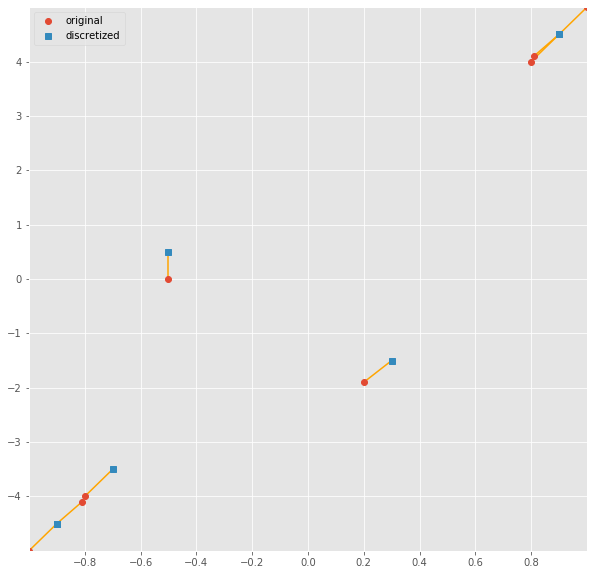

In [12]:
# Default, 10 bins
visualize_samples(samples, discretized_samples, grid, low, high)


/home/t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


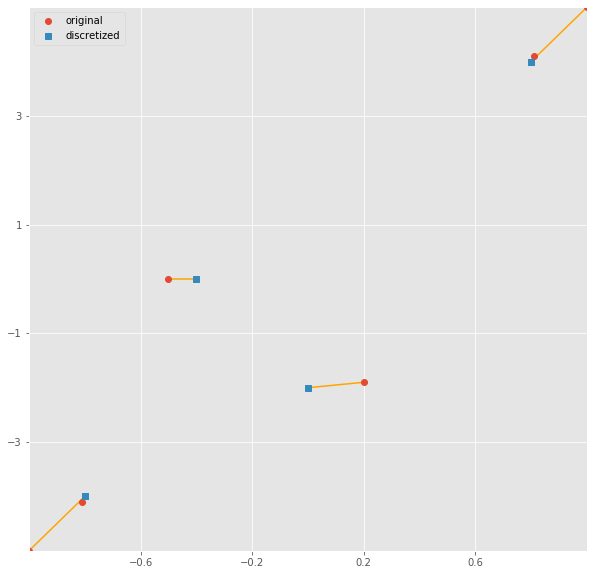

In [13]:
visualize_samples(samples, discretized_samples_5, grid_5, low, high)

/home/t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


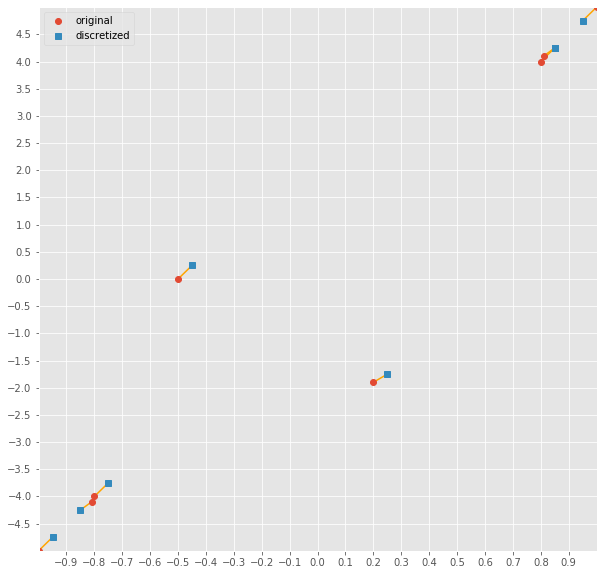

In [14]:
visualize_samples(samples, discretized_samples_20, grid_20, low, high)

/home/t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


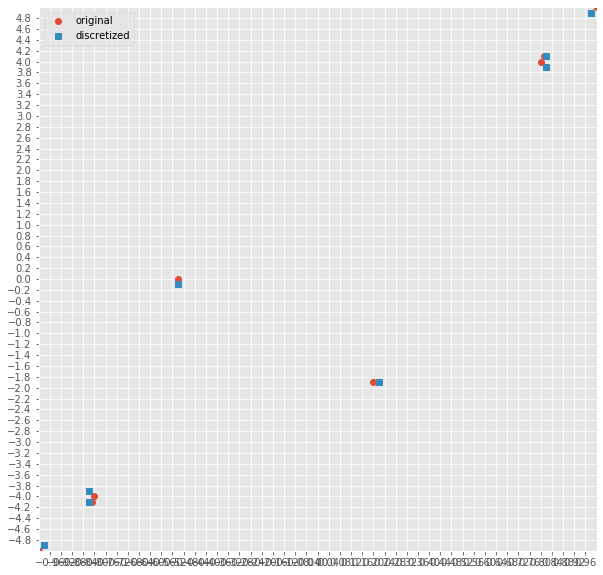

In [15]:
visualize_samples(samples, discretized_samples_50, grid_50, low, high)

In [16]:
# Create a grid to discretize the state space
state_grid = create_uniform_grid(env.observation_space.low, env.observation_space.high, bins=(10, 10))
state_grid

[array([-1.02, -0.84, -0.66, -0.48, -0.3 , -0.12,  0.06,  0.24,  0.42]),
 array([-5.600e-02, -4.200e-02, -2.800e-02, -1.400e-02,  6.939e-18,  1.400e-02,  2.800e-02,  4.200e-02,  5.600e-02])]

/home/t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


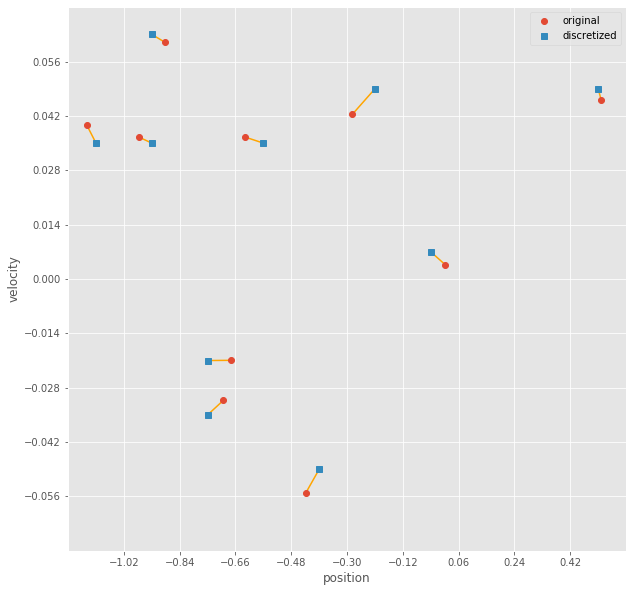

In [17]:
# Obtain some samples from the space, discretize them, and then visualize them
state_samples = np.array([env.observation_space.sample() for i in range(10)])
discretized_state_samples = np.array([discretize(sample, state_grid) for sample in state_samples])
visualize_samples(state_samples, discretized_state_samples, state_grid,
                  env.observation_space.low, env.observation_space.high)
plt.xlabel('position'); plt.ylabel('velocity');  # axis labels for MountainCar-v0 state space

/home/t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


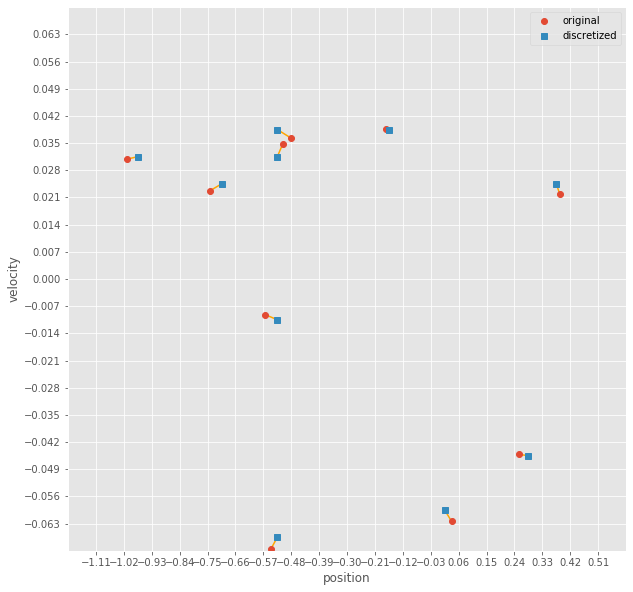

In [18]:
# Create a grid to discretize the state space
state_grid_20 = create_uniform_grid(env.observation_space.low, env.observation_space.high, bins=(20, 20))
state_grid

# Obtain some samples from the space, discretize them, and then visualize them
state_samples = np.array([env.observation_space.sample() for i in range(10)])
discretized_state_samples_20 = np.array([discretize(sample, state_grid_20) for sample in state_samples])
visualize_samples(state_samples, discretized_state_samples_20, state_grid_20,
                  env.observation_space.low, env.observation_space.high)
plt.xlabel('position'); plt.ylabel('velocity');  # axis labels for MountainCar-v0 state space

/home/t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


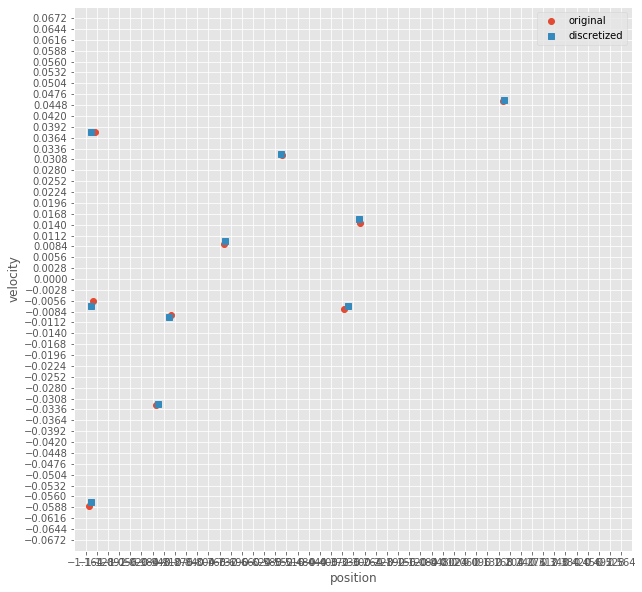

In [19]:
# Create a grid to discretize the state space
state_grid_50 = create_uniform_grid(env.observation_space.low, env.observation_space.high, bins=(50, 50))
state_grid

# Obtain some samples from the space, discretize them, and then visualize them
state_samples = np.array([env.observation_space.sample() for i in range(10)])
discretized_state_samples_50 = np.array([discretize(sample, state_grid_50) for sample in state_samples])
visualize_samples(state_samples, discretized_state_samples_50, state_grid_50,
                  env.observation_space.low, env.observation_space.high)
plt.xlabel('position'); plt.ylabel('velocity');  # axis labels for MountainCar-v0 state space

In [20]:
def q_learning_discrete(env, num_episodes, alpha=0.85, discount_factor=0.99, bins = (10,10)):
    """
    Q learning algorithm, off-polics TD control. Finds optimal gready policies
    Args:
    - env: Given environment to solve
    - num_episodes: Number of episodes to learn
    - alpha: learning rate
    - discount factor: weight/importance given to future rewards
    - epsilon: probability of taking random action. 
             We are using decaying epsilon, 
             i.e high randomness at beginning and low towards end
    Returns:
    - Optimal Q
    """
     
    # decaying epsilon, i.e we will divide num of episodes passed
    epsilon = 1.0
    score = 0.0
    # create a numpy array filled with zeros 
    # rows = number of observations & cols = possible actions
    
    state_grid = create_uniform_grid(env.observation_space.low, env.observation_space.high, bins)
    q_table = np.zeros([env.action_space.n, bins[0], bins[1]]) 
    
    for i_episode in range(num_episodes):
            # reset the env
            state = env.reset()
            discrete_state = np.array(discretize(state, state_grid)) 
            
            # itertools.count() has similar to 'while True:'
            for t in itertools.count():
                # generate a random num between 0 and 1 e.g. 0.35, 0.73 etc..
                # if the generated num is smaller than epsilon, we follow exploration policy 
                if random.uniform(0, 1) < epsilon:
                    action = env.action_space.sample()
                    # select a random action from set of all actions
                else:
                    action = np.argmax(q_table[:, discrete_state[0], discrete_state[1]])
                    # if the generated num is greater than epsilon, we follow exploitation policy
                    # select an action with highest value for current state
                    
                next_state, reward, is_finished, info = env.step(action)
                discrete_next_state = np.array(discretize(next_state, state_grid))
                
                # apply selected action, collect values for next_state and reward
                old_value = q_table[action, discrete_state[0], discrete_state[1]]
                next_max  = np.max(q_table[:, discrete_next_state[0], discrete_next_state[1]])
                new_value = old_value+alpha*(reward+(discount_factor*next_max)-old_value)
                # Update the Q table, alpha is the learning rate
                q_table[action, discrete_state[0], discrete_state[1]] = new_value
                
                # break if done, i.e. if end of this episode
                if is_finished:
                    break
                # make the next_state into current state as we go for next iteration
                state = next_state
                discrete_state = np.array(discretize(state, state_grid)) 
                env.render()
                score += reward
        
            # gradualy decay the epsilon
            if epsilon > 0.1:
                epsilon -= 1.0/num_episodes
                
    
    print("Training finished.\n")
    print("Final score is ", score)
    print(q_table)
    
    return q_table   # return optimal Q

In [ ]:
Q = q_learning_discrete(env, 2000)
#test with default parameters


In [22]:
env.close()
q_table = np.zeros([3, 9, 9],dtype=int) 
print(q_table)
print(q_table[1,1,5])

[[[0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]]]
0
